## セットアップ
!!!ランタイムのハードウェアアクセラレータを**GPU**に設定すること!!!

In [1]:
# ライブラリインストール
!pip install git+https://github.com/rinnakk/japanese-stable-diffusion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rinnakk/japanese-stable-diffusion to /tmp/pip-req-build-1k2wmgp2
  Running command git clone -q https://github.com/rinnakk/japanese-stable-diffusion /tmp/pip-req-build-1k2wmgp2
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-install-a36r8wwo/diffusers_b2ed92e615b34c12ae3b2f9a1d8cabe2
  Running command git clone -q https://github.com/huggingface/diffusers /tmp/pip-install-a36r8wwo/diffusers_b2ed92e615b34c12ae3b2f9a1d8cabe2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 15.2 MB/s 
     |████████████████████████████████| 1.6 MB 66.2 MB/s 
     |████████████████████████████████| 5.8 MB 62.3 MB/s 
     |████████████████████████████████| 13.8 MB 50.7 MB/s 
     |████████████████████████████████| 182 kB 78.4 MB/s 
     |████████

In [2]:
# huggingface hubのtokenをセット
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.huggingface/token
Login successful


In [3]:
# ライブラリインポート
import torch
from torch import autocast
from diffusers import LMSDiscreteScheduler
from japanese_stable_diffusion import JapaneseStableDiffusionPipeline
from IPython.display import Image,display

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## オリジナルのJapanese Stable Diffusion

In [4]:
# モデルロード
model_id = "rinna/japanese-stable-diffusion"

# Use the K-LMS scheduler here instead
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
pipe_vanilla = JapaneseStableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, use_auth_token=True, torch_dtype=torch.float16)
pipe_vanilla = pipe_vanilla.to(DEVICE)
pipe_vanilla.safety_checker = None

Downloading:   0%|          | 0.00/549 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.68k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/312 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/535 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/439M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/153 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/534 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
The config attributes {'requires_safety_checker': True} were passed to JapaneseStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.


The config attributes {'requires_safety_checker': True} were passed to JapaneseStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
The config attributes {'requires_safety_checker': True} were passed to JapaneseStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.


  0%|          | 0/50 [00:00<?, ?it/s]

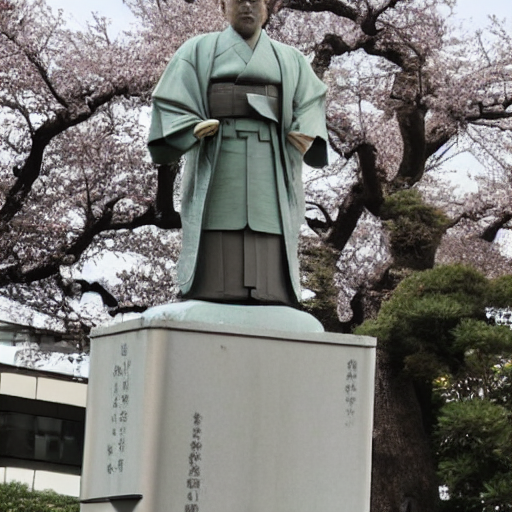

In [5]:
# プロンプト指定
prompt = "福澤諭吉像の写真" #@param {type:"string"}

# 生成
result = pipe_vanilla(prompt=prompt,
                      num_inference_steps=50,
                      guidance_scale=8)
image = result.images[0]

# 表示
display(image)

# 保存
# out_path = prompt+'.png'
# image.save(out_path)

## SFCOCO2021+2022でfine-tuneしたモデル

In [6]:
# モデルロード
model_id = "nu-dialogue/sfc2022-stable-diffusion"

# Use the K-LMS scheduler here instead
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
pipe_sfcoco = JapaneseStableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, use_auth_token=True, torch_dtype=torch.float16)
pipe_sfcoco = pipe_sfcoco.to(DEVICE)
pipe_sfcoco.safety_checker = None

Downloading:   0%|          | 0.00/583 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/518 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.87k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/630 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/219M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/170 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/963 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/609 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

The config attributes {'requires_safety_checker': True} were passed to JapaneseStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'requires_safety_checker': True} are not expected by JapaneseStableDiffusionPipeline and will be ignored.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
The config attributes {'requires_safety_checker': True} were passed to JapaneseStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.


The config attributes {'requires_safety_checker': True} were passed to JapaneseStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
The config attributes {'requires_safety_checker': True} were passed to JapaneseStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.


  0%|          | 0/50 [00:00<?, ?it/s]

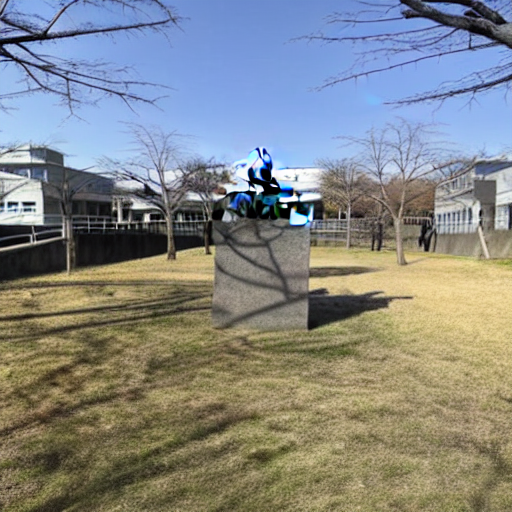

In [15]:
# プロンプト指定
prompt = "福澤諭吉像の写真" #@param {type:"string"}

# 生成
result = pipe_sfcoco(prompt=prompt,
                     num_inference_steps=50,
                     guidance_scale=7.5,
                     width=512,
                     height=512,
                     )
image = result.images[0]

# 表示
display(image)

# 保存
# out_path = prompt+'.png'
# image.save(out_path)